Foto #1

# What is Data?

### Data are units of information, often numeric, that are collected through observation. In a more technical sense, data are a set of values of qualitative or quantitative variables about one or more persons or objects, while a datum is a single value of a single variable. Everything that surronds us is the data. From house prices to car mileage, from weather forecast to distance walked everyting in our life is a huge data.

##### Source: [Wikipedia](https://en.wikipedia.org/wiki/Data)

## Data Type of Our Age: Multimedia

### Any information that contains anything regarding numbers, text, images, audio, and video is defined as Multimedia. Regardless of their types, they are always stored in numbers at the end.



Foto #2

# How To Find Datasets (World Bank Open Data, Registry of Open Data on AWS (RODA), Kaggle, Google Datasets, UCI, KDNuggets etc.)

### freeCodeCamp
https://github.com/freeCodeCamp/open-data

### FiveThirtyEight
https://data.fivethirtyeight.com/ 

### Data.gov
https://www.data.gov/

### DBpedia
https://www.dbpedia.org/

### UNICEF Data
https://data.unicef.org/

### Google Public Data
https://www.google.com/publicdata/directory

### Registry of Open Data on AWS (RODA)
https://registry.opendata.aws/

### Kaggle
https://www.kaggle.com/datasets

### UCI
https://archive.ics.uci.edu/ml/index.php

### KDNuggets
https://www.kdnuggets.com/



# Data's Statistical Journey

### Importing All Relevant Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Create simple and custom Dataset
Dataset is an object that holds our data as row and columns. This allows us to store, manipulate and prepare our data for analysis or for our ML model.

You can create a dataset with Pandas library. To do that, you should use DataFrame method of Pandas library which takes container types such as lists or dictionary as input. It also supports to indicate custom column names for data if needed or desired.

Let's create a Dataset that has a hundred students in it. Each student has a gender, faculty, GPA, and Id.

In [ ]:
# Creating a dictionary to store all of the generated values together
dictionary_form = {'gender': np.random.choice(["female", "male"], 100),  # this creates a list which has a hundred randomly selected female and males in it                
                   'faculty': np.random.choice(["COE", "EEE", "IE"], 100), # this creates a list which has a hundred randomly selected COE, EEE and IE's in it
                   'gpa': np.random.uniform(0, 4, 100),  # this creates a list which has a hundred randomly selected float values between 0 and 4
                   'id': np.random.randint(1000000, 9999999, 100)}  # this creates a list which has a hundred randomly selected integer values between 1000000 and 9999999


In [ ]:
# Converting the Dictionary to Dataframe format to be read by Pandas
dataframe_form = pd.DataFrame(dictionary_form)
dataframe_form.head()  # head method displays first 5 row of the dataframe

,gender,faculty,gpa,id
0,female,EEE,0.182530,4805723
1,male,COE,0.474965,3669004
2,male,EEE,3.105187,6894059
3,male,IE,1.613133,7236582
4,male,IE,0.852714,5703323


### Exploratory Data Analysis (EDA) with Pandas
There are several information gathering methods in pandas.
- df.head() is for viewing the top of the dataframe
- df.tail() is for viewing the bottom of the dataframe
- df.info() is for printing the column datatypes, non-null values and memory usage of the dataframe
- df.columns is for access the column names
- df.shape is for access the row and column counts
- df.size is for access the cell count 

In [ ]:
dataframe_form.tail(7)  # tail(n) method displays last n row of the dataframe

,gender,faculty,gpa,id
93,male,EEE,2.394687,8100667
94,female,IE,3.863373,5653864
95,male,EEE,2.183448,4485426
96,female,IE,1.005833,1831783
97,male,COE,0.837933,5267076
98,male,IE,0.069523,9652596
99,male,EEE,2.528113,1901201


In [ ]:
dataframe_form.info()  # info method prints information of dtype and columns, non-null values and memory usage of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   100 non-null    object 
 1   faculty  100 non-null    object 
 2   gpa      100 non-null    float64
 3   id       100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
dataframe_form.columns

Index(['gender', 'faculty', 'gpa', 'id'], dtype='object')

In [ ]:
dataframe_form.shape  # (row count, column count)

(100, 4)

In [ ]:
dataframe_form.size  # row count times column count

400

#### Column data type conversions
* df.select_dtypes() method gets a parameter dtype and gathers all columns that have that dtype
* df[column_name].astype() method gets a parameter dtype and converts all value to the given dtype
- [!] Warning: Conversion errors in python are valid for astype method. For example, if there is a cell in a column that has a letter in it, it causes an error to convert that column to integer or float.

In [ ]:
# Possible error due to conversion
dataframe_form['faculty'] = dataframe_form['faculty'].astype('float64')

ValueError: ignored

In [ ]:
# Covert objects to categorical variables
object_columns = dataframe_form.select_dtypes("object").columns  #  select_dtypes method selects columns that has given dtype, columns returns selected columns as list


for colname in object_columns:  # iterate all columns in list
    dataframe_form[colname] = dataframe_form[colname].astype('category')  # astype method converts the selected column dtype to the given dtype

# Check it worked
dataframe_form.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   gender   100 non-null    category
 1   faculty  100 non-null    category
 2   gpa      100 non-null    float64 
 3   id       100 non-null    int64   
dtypes: category(2), float64(1), int64(1)
memory usage: 2.1 KB


#### Pandas Column Specifiers
- df.iloc[]
- df.loc[]

In [ ]:
# Display the genders of the all students
dataframe_form["gender"]

0     female
1       male
2       male
3       male
4       male
       ...  
95      male
96    female
97      male
98      male
99      male
Name: gender, Length: 100, dtype: category
Categories (2, object): ['female', 'male']

In [ ]:
# Display the faculities of the all students
dataframe_form["faculty"]

0     EEE
1     COE
2     EEE
3      IE
4      IE
     ... 
95    EEE
96     IE
97    COE
98     IE
99    EEE
Name: faculty, Length: 100, dtype: category
Categories (3, object): ['COE', 'EEE', 'IE']

In [ ]:
# Display the GPA's of the all students
dataframe_form["gpa"]

0     0.182530
1     0.474965
2     3.105187
3     1.613133
4     0.852714
        ...   
95    2.183448
96    1.005833
97    0.837933
98    0.069523
99    2.528113
Name: gpa, Length: 100, dtype: float64

##### loc

In [ ]:
'''
loc method gets [index, column] and lists them. 
Get the faculty of students that has index between 30-50
'''
dataframe_form.loc[30:50, "faculty"]  

30    EEE
31     IE
32    EEE
33    EEE
34    EEE
35    EEE
36     IE
37     IE
38     IE
39    COE
40     IE
41    EEE
42    EEE
43     IE
44    EEE
45     IE
46    COE
47     IE
48    EEE
49     IE
50    EEE
Name: faculty, dtype: category
Categories (3, object): ['COE', 'EEE', 'IE']

##### iloc

In [ ]:
'''
iloc method gets [index] and lists them. 
Get the faculty of students that has numeric index between 30-50
'''
dataframe_form.iloc[30:50]

,gender,faculty,gpa,id
30,male,EEE,3.245782,2201531
31,female,IE,2.198495,6810395
32,female,EEE,1.154719,7427541
33,female,EEE,3.290397,8988908
34,female,EEE,0.232105,2045060
35,female,EEE,3.781413,2498580
36,male,IE,2.152534,7676402
37,female,IE,2.803884,7213949
38,male,IE,3.663710,6434561
39,male,COE,1.228749,8963073


#### df.groupby()

groupby() method groups the data according to given value in order to explore statistical informations according to other columns

In [ ]:
faculty_groups = dataframe_form.groupby("faculty")
faculty_groups["gender"].value_counts()  # value_counts method displays the counts of the given column by a group

faculty  gender
COE      male      14
         female    12
EEE      male      21
         female    20
IE       male      19
         female    14
Name: gender, dtype: int64

In [ ]:
faculty_groups["gpa"].mean()

faculty
COE    1.979328
EEE    1.789689
IE     1.872238
Name: gpa, dtype: float64

In [ ]:
#You can group the data by multiple columns (order should be considered)
faculty_gender_groups = dataframe_form.groupby(["faculty", "gender"])

In [ ]:
faculty_gender_groups["gpa"].mean()

faculty  gender
COE      female    2.209405
         male      1.782120
EEE      female    1.712549
         male      1.863156
IE       female    2.291890
         male      1.563021
Name: gpa, dtype: float64

In [ ]:
gender_faculty_groups = dataframe_form.groupby(["gender", "faculty"])

In [ ]:
gender_faculty_groups["gpa"].mean()

gender  faculty
female  COE        2.209405
        EEE        1.712549
        IE         2.291890
male    COE        1.782120
        EEE        1.863156
        IE         1.563021
Name: gpa, dtype: float64

#### Simple Visualization with Matplotlib


Visualization is one of the most important and fundamental phase of the EDA since it helps us to understand and interpret the data regardless of it's size.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
male = dataframe_form.loc[dataframe_form["gender"] == "male"]  # locate the rows where gender equals male in dataframe
female = dataframe_form.loc[dataframe_form["gender"] == "female"]  # locate the rows where gender equals female in dataframe

Text(0, 0.5, 'GPA')

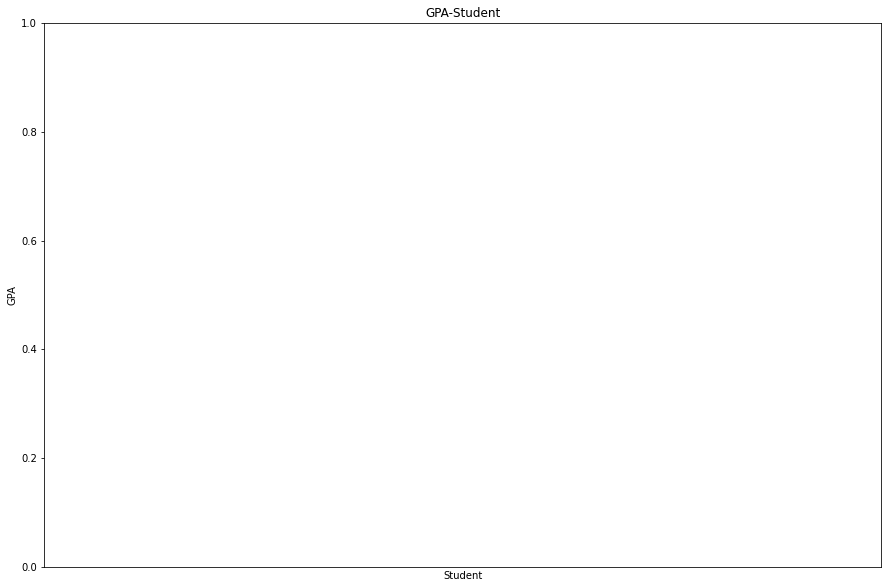

In [ ]:
# Configure plot settings
plt.figure(figsize=(15,10))
plt.xticks([])
plt.title("GPA-Student")
plt.xlabel("Student")
plt.ylabel("GPA")

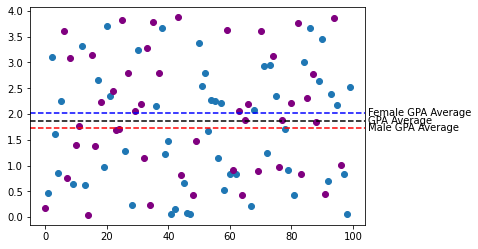

In [ ]:
# Plot Female and Male GPA's
plt.scatter(male.index, male["gpa"])
plt.scatter(female.index, female["gpa"], color="purple")

# mean method calculates the mean of a given column
# Draw means of GPA's of all students
plt.axhline(dataframe_form["gpa"].mean(), linestyle ="dashed", color="black")
plt.text(105, dataframe_form["gpa"].mean(), 'GPA Average', ha="left", va="center")

# Draw means of GPA's of Male students
plt.axhline(female["gpa"].mean(), linestyle ="dashed", color="blue")
plt.text(105, female["gpa"].mean(), 'Female GPA Average', ha="left", va="center")

# Draw means of GPA's of Female students
plt.axhline(male["gpa"].mean(), linestyle ="dashed", color="red")
plt.text(105, male["gpa"].mean(), 'Male GPA Average', ha="left", va="center")
plt.show()

In [ ]:
# Let's create a new data frame with more columns (Gender, Id, and 6 lessons)

dictionary_form = {'Gender': np.random.choice(["female", "male"], 100),
                  'Data Structures': np.random.randint(0, 100, 100),
                  'Linear Algebra': np.random.randint(0, 100, 100),
                  'Advanced Programming': np.random.randint(0, 100, 100),
                  'Database Systems': np.random.randint(0, 100, 100),
                  'Cyber Security': np.random.randint(0, 100, 100),
                  'Computer Vision': np.random.randint(0, 100, 100),
                  'ID':np.random.randint(1000000, 9999999, 100)}

In [ ]:
# Converting the Dictionary to Dataframe format to be read by Pandas
df = pd.DataFrame(dictionary_form)
df.head()

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,female,11,69,75,62,3,31,7760079
1,male,40,8,74,7,65,45,8091073
2,male,3,71,21,51,56,38,2941749
3,male,27,11,62,28,92,10,1308071
4,female,89,52,78,11,31,88,9881647


In [ ]:
'''
describe method prints count, mean, standart deviation, min, 
quartiles of the all possible (numerical) columns 
'''
df.describe()

,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.860000,49.06000,47.830000,45.720000,50.380000,51.650000,5.468048e+06
std,28.094365,29.51453,28.912286,28.300366,31.153183,29.012145,2.691262e+06
min,1.000000,0.00000,0.000000,2.000000,0.000000,0.000000,1.051872e+06
25%,26.750000,23.25000,21.000000,22.000000,20.750000,28.250000,3.015487e+06
50%,47.500000,52.50000,45.500000,43.000000,54.000000,55.500000,5.012536e+06
75%,74.250000,71.25000,73.000000,69.500000,77.250000,76.500000,8.131550e+06
max,98.000000,99.00000,99.000000,98.000000,99.000000,99.000000,9.891040e+06


In [ ]:
'''
# T instance takes the transpose of the matrix and in some situations this can 
be helpful for better understanding 
'''
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Data Structures,100.0,50.86,2.809436e+01,1.0,26.75,47.5,74.25,98.0
Linear Algebra,100.0,49.06,2.951453e+01,0.0,23.25,52.5,71.25,99.0
Advanced Programming,100.0,47.83,2.891229e+01,0.0,21.00,45.5,73.00,99.0
Database Systems,100.0,45.72,2.830037e+01,2.0,22.00,43.0,69.50,98.0
Cyber Security,100.0,50.38,3.115318e+01,0.0,20.75,54.0,77.25,99.0
Computer Vision,100.0,51.65,2.901214e+01,0.0,28.25,55.5,76.50,99.0
ID,100.0,5468048.17,2.691262e+06,1051872.0,3015487.00,5012535.5,8131549.50,9891040.0


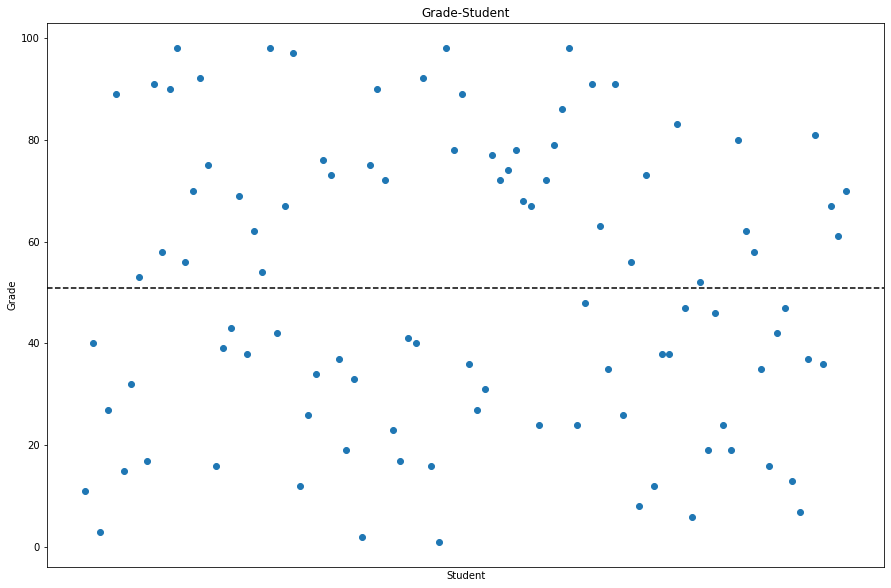

In [ ]:
# Configure plot settings
plt.figure(figsize=(15,10))
plt.xticks([])
plt.title("Grade-Student")
plt.xlabel("Student")
plt.ylabel("Grade")

# Plot grades
plt.scatter(df["Data Structures"].index, df["Data Structures"])

# Draw mean line
plt.axhline(df["Data Structures"].mean(), linestyle ="dashed", color="black")
plt.show()

#### Mathematical Operations with Pandas

 Let's apply curve to the Data Structures and Linear Algebra lessons

In [ ]:
print(df["Data Structures"].mean())
print(df["Linear Algebra"].mean())

50.86
49.06


In [ ]:
# We know that the mean of the lessons are less then 60, however it's good to add a condition to check it
df_columns = ["Data Structures","Linear Algebra"]

for col in df_columns:
  if df[col].mean() < 60:  # if mean of the lesson is less than 60
    df[col] = df[col] + (60-df[col].mean())  # add 60 - mean to all students' grades
    df.loc[df[col] > 100, col] = 100  # if there is any student' grade is more than 100, equalize it to 100

In [ ]:
print(df["Data Structures"].mean())
print(df["Linear Algebra"].mean())

# New means are nearly 60. The reason that it is not equal to 60 is that equalizing the grades of the students who have more than a hundred to a hundred

59.62600000000008
59.28599999999993


In [ ]:
passed_students = df.loc[df["Data Structures"] >= 59.5, "Data Structures"]  # get the students who passed the class (grade > 59.5)

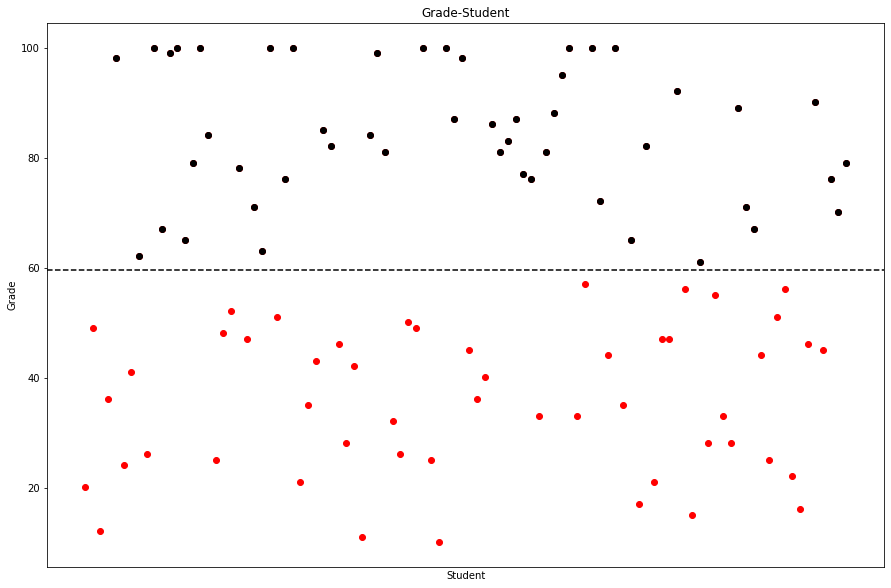

In [ ]:
# Configure plot settings
plt.figure(figsize=(15,10))
plt.xticks([])
plt.title("Grade-Student")
plt.xlabel("Student")
plt.ylabel("Grade")

# Plot grades
plt.scatter(df["Data Structures"].index,df["Data Structures"], color="red")  # draw all students with red
plt.scatter(passed_students.index,passed_students, color="black")  # redraw the passed students with black

# Draw mean line
plt.axhline(df["Data Structures"].mean(), linestyle="dashed", color="black")
plt.show()

#### Mean, Min, Max, Variance and Standard Deviation

In [ ]:
# Mean, min, max, standard deviation
df["Data Structures"].mean(), df["Data Structures"].min(), df["Data Structures"].max(), df["Data Structures"].var(), df["Data Structures"].std()

(59.62600000000008, 10.14, 100.0, 756.462387878788, 27.503861326708073)

#### Special Pandas Methods

##### df.stack()
Converts columns to indexes

In [ ]:
stacked_df = df.stack()
stacked_df

0   Gender                   female
    Data Structures           20.14
    Linear Algebra            79.94
    Advanced Programming         75
    Database Systems             62
                             ...   
99  Advanced Programming         81
    Database Systems             38
    Cyber Security               77
    Computer Vision              79
    ID                      4203095
Length: 800, dtype: object

In [ ]:
print(df.columns)
stacked_df[0].index

Index(['Gender', 'Data Structures', 'Linear Algebra', 'Advanced Programming',
       'Database Systems', 'Cyber Security', 'Computer Vision', 'ID'],
      dtype='object')


Index(['Gender', 'Data Structures', 'Linear Algebra', 'Advanced Programming',
       'Database Systems', 'Cyber Security', 'Computer Vision', 'ID'],
      dtype='object')

In [ ]:
'''
np.where returns indexes that are the same as the given parameter 
here we want the index of the ID column in the stacked dataframe
'''
np.where(stacked_df[0].index=="ID")  

(array([7]),)

In [ ]:
# 7 is the index of the ID's
print(stacked_df[0][7] == df.loc[0,"ID"])  # stacked_df[0][7] returns the id of the first student df.loc[0,"ID"] is also returns the id of the first student

np.any([stacked_df[x][7] != df.loc[x,"ID"] for x in range(len(df)-1)]) # np.any returns true if there is at least one False value in the given list
# here we are checking that are there any not matched id with df and stacked_df, False means all Id's are matched 

True


False

Let's calculate mean, variance and standard deviation manually with help of stack

In [ ]:
# Manual mean calculation
summ = 0
for i in range(len(stacked_df)//len(stacked_df[0])):
  summ += stacked_df[i]["Data Structures"]  # sum the all grades
  
mean = summ/df["Data Structures"].shape[0]  #  divide it by the student count
mean

59.62600000000008

In [ ]:
# Manual variance and standard deviation calculation
summ = 0
for i in range(len(stacked_df)//len(stacked_df[0])):
  summ += (stacked_df[i]["Data Structures"] - mean)**2  # sum the square of the all grades

variance = summ/df["Data Structures"].shape[0]  # divide the sum by student count, this is variance
std = variance**0.5  # square root of variance equals to standard deviation

variance, std

(748.8977640000002, 27.365996491997148)

In [ ]:
df["Data Structures"].var(ddof=0) == variance   # Check if it's true  

True

In [ ]:
df["Data Structures"].std(ddof=0) == std  # Check if it's true  

True

In [ ]:
stacked_df.unstack()  # unstack converts a stacked dataframe to its original state

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,female,20.14,79.94,75,62,3,31,7760079
1,male,49.14,18.94,74,7,65,45,8091073
2,male,12.14,81.94,21,51,56,38,2941749
3,male,36.14,21.94,62,28,92,10,1308071
4,female,98.14,62.94,78,11,31,88,9881647
...,...,...,...,...,...,...,...,...
95,female,90.14,74.94,7,16,85,22,3863907
96,female,45.14,71.94,36,90,47,25,1192463
97,female,76.14,100,35,55,54,98,4308540
98,male,70.14,43.94,58,17,76,56,3910266


##### pd.melt()


melt() breaks down the columns into row values

In [ ]:
melted_df = pd.melt(df, id_vars=["Gender"], value_vars=["Data Structures", "Linear Algebra"])
melted_df

,Gender,variable,value
0,female,Data Structures,20.14
1,male,Data Structures,49.14
2,male,Data Structures,12.14
3,male,Data Structures,36.14
4,female,Data Structures,98.14
...,...,...,...
195,female,Linear Algebra,74.94
196,female,Linear Algebra,71.94
197,female,Linear Algebra,100.00
198,male,Linear Algebra,43.94


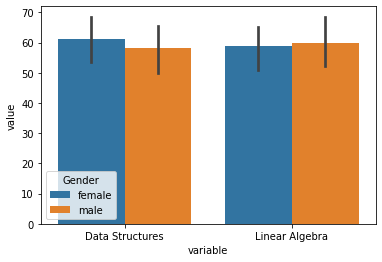

In [ ]:
'''
it can be written as x="variable" means "Gender" and y="value" means "Data Structures" and "Linear Algebra" 
thanks to the melt we couldn't get that visualization without melt method
'''
sns.barplot(data=melted_df, x="variable", y="value", hue="Gender")  

##### df.drop()

drop method drops the given column(s) for given axis

- axis = 0 -> Row based
- axis = 1 -> Columns based

since inplace=False in drop method, we don't lose the data from original one

![WARNING]: if its used with inplace=True; it returns nothing and drops the column(s) from the original dataset which is df in our scenario

In [ ]:
gender_dropped = df.drop("Gender", axis=1, inplace=False)  
gender_dropped

,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,20.14,79.94,75,62,3,31,7760079
1,49.14,18.94,74,7,65,45,8091073
2,12.14,81.94,21,51,56,38,2941749
3,36.14,21.94,62,28,92,10,1308071
4,98.14,62.94,78,11,31,88,9881647
...,...,...,...,...,...,...,...
95,90.14,74.94,7,16,85,22,3863907
96,45.14,71.94,36,90,47,25,1192463
97,76.14,100.00,35,55,54,98,4308540
98,70.14,43.94,58,17,76,56,3910266


In [ ]:
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,female,20.14,79.94,75,62,3,31,7760079
1,male,49.14,18.94,74,7,65,45,8091073
2,male,12.14,81.94,21,51,56,38,2941749
3,male,36.14,21.94,62,28,92,10,1308071
4,female,98.14,62.94,78,11,31,88,9881647
...,...,...,...,...,...,...,...,...
95,female,90.14,74.94,7,16,85,22,3863907
96,female,45.14,71.94,36,90,47,25,1192463
97,female,76.14,100.00,35,55,54,98,4308540
98,male,70.14,43.94,58,17,76,56,3910266


##### Adding New Columns
You can add new column by specfying column name as indexing and assigning value to it as shown below. 

Let's add a new lesson to our dataset for example.

In [ ]:
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID
0,female,20.14,79.94,75,62,3,31,7760079
1,male,49.14,18.94,74,7,65,45,8091073
2,male,12.14,81.94,21,51,56,38,2941749
3,male,36.14,21.94,62,28,92,10,1308071
4,female,98.14,62.94,78,11,31,88,9881647
...,...,...,...,...,...,...,...,...
95,female,90.14,74.94,7,16,85,22,3863907
96,female,45.14,71.94,36,90,47,25,1192463
97,female,76.14,100.00,35,55,54,98,4308540
98,male,70.14,43.94,58,17,76,56,3910266


In [ ]:
df.shape

(100, 8)

In [ ]:
'''
add randomly generated "df.shape[0]" (100) piece of integer between 0 and 100
'''
df["Ethics"] = np.random.randint(0, 100, df.shape[0])
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,ID,Ethics
0,female,20.14,79.94,75,62,3,31,7760079,39
1,male,49.14,18.94,74,7,65,45,8091073,1
2,male,12.14,81.94,21,51,56,38,2941749,8
3,male,36.14,21.94,62,28,92,10,1308071,75
4,female,98.14,62.94,78,11,31,88,9881647,28
...,...,...,...,...,...,...,...,...,...
95,female,90.14,74.94,7,16,85,22,3863907,54
96,female,45.14,71.94,36,90,47,25,1192463,16
97,female,76.14,100.00,35,55,54,98,4308540,39
98,male,70.14,43.94,58,17,76,56,3910266,62


In [ ]:
df.shape

(100, 9)

##### df.reindex()

Reorders the current columns

In [ ]:
'''
ID stuck between two lesson, let's change their order
We need a list of column names with desired order
'''
cols = df.columns.tolist()
cols[-1], cols[-2] = cols[-2], cols[-1]
cols

['Gender',
 'Data Structures',
 'Linear Algebra',
 'Advanced Programming',
 'Database Systems',
 'Cyber Security',
 'Computer Vision',
 'Ethics',
 'ID']

In [ ]:
# Setting up new column order
df = df.reindex(cols,axis=1)
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,20.14,79.94,75,62,3,31,39,7760079
1,male,49.14,18.94,74,7,65,45,1,8091073
2,male,12.14,81.94,21,51,56,38,8,2941749
3,male,36.14,21.94,62,28,92,10,75,1308071
4,female,98.14,62.94,78,11,31,88,28,9881647
...,...,...,...,...,...,...,...,...,...
95,female,90.14,74.94,7,16,85,22,54,3863907
96,female,45.14,71.94,36,90,47,25,16,1192463
97,female,76.14,100.00,35,55,54,98,39,4308540
98,male,70.14,43.94,58,17,76,56,62,3910266


##### df.append()

In [ ]:
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,20.14,79.94,75,62,3,31,39,7760079
1,male,49.14,18.94,74,7,65,45,1,8091073
2,male,12.14,81.94,21,51,56,38,8,2941749
3,male,36.14,21.94,62,28,92,10,75,1308071
4,female,98.14,62.94,78,11,31,88,28,9881647
...,...,...,...,...,...,...,...,...,...
95,female,90.14,74.94,7,16,85,22,54,3863907
96,female,45.14,71.94,36,90,47,25,16,1192463
97,female,76.14,100.00,35,55,54,98,39,4308540
98,male,70.14,43.94,58,17,76,56,62,3910266


In [ ]:
'''
Append two more student to the dataset
![Warning] It has to be equalized to the dataframe while appending  
df = df.append(), there is no inplace parameter for append
'''
for i in range(2):
  df = df.append({'Gender': np.random.choice(["female","male"]),
                  'Data Structures': np.random.randint(0,100),
                  'Linear Algebra': np.random.randint(0,100),
                  'Advanced Programming': np.random.randint(0,100),
                  'Database Systems': np.random.randint(0,100),
                  'Cyber Security': np.random.randint(0,100),
                  'Computer Vision': np.random.randint(0,100),
                  'ID':np.random.randint(1000000,9999999)},ignore_index=True)


In [ ]:
df.tail()
# we forget to add ethics lesson :(

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
97,female,76.14,100.00,35,55,54,98,39.0,4308540
98,male,70.14,43.94,58,17,76,56,62.0,3910266
99,male,79.14,88.94,81,38,77,79,68.0,4203095
100,female,4.00,83.00,78,63,42,30,NaN,4417892
101,female,87.00,8.00,37,49,53,67,NaN,4332890


#### Handling Missing Values
In real life, data will not be perfectly balanced and full. To be honest, most of the data requires preprocessing before being analysed. This phase includes cleaning the outlier and missing value and many more.

For handling missing values which can be considered as NULL or NaN, we are using special methods provided us by Pandas itself which are 

- **isna():** isna method returns a list of True and False's for all cells in the dataframe.
- **dropna():** drops the nan values according to the given axis parameter



The difference between NULL & NaN:
(NULL values represents "no value" or "nothing", it's not even an empty string or zero. It can be used to represent that nothing useful exists.  

NaN stands for "Not a Number", it's usually the result of a mathematical operation that doesn't make sense, e.g. 0.0/0.0.)


In [ ]:
''' 
sum method sums all the Trues in all columns which in this case, NaN columns will be True 
since we are using isna()
'''
df.isna().sum()  

Gender                  0
Data Structures         0
Linear Algebra          0
Advanced Programming    0
Database Systems        0
Cyber Security          0
Computer Vision         0
Ethics                  2
ID                      0
dtype: int64

In [ ]:
df[df["Ethics"].isna()]  # print the rows which include nan

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
100,female,4.0,83.0,78,63,42,30,NaN,4417892
101,female,87.0,8.0,37,49,53,67,NaN,4332890


In [ ]:
'''
at method finds the given index and column and you can change that value by equalizing it to any value
 df.loc[100,"Ethics"] = np.random.randint(0,100) same with above
'''
df.at[100,"Ethics"] = np.random.randint(0, 100)
df.tail()

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
97,female,76.14,100.00,35,55,54,98,39.0,4308540
98,male,70.14,43.94,58,17,76,56,62.0,3910266
99,male,79.14,88.94,81,38,77,79,68.0,4203095
100,female,4.00,83.00,78,63,42,30,82.0,4417892
101,female,87.00,8.00,37,49,53,67,NaN,4332890


In [ ]:
df = df.dropna()  # dropna drops a row if there is any nan value in a spesific column
df.tail()

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
96,female,45.14,71.94,36,90,47,25,16.0,1192463
97,female,76.14,100.00,35,55,54,98,39.0,4308540
98,male,70.14,43.94,58,17,76,56,62.0,3910266
99,male,79.14,88.94,81,38,77,79,68.0,4203095
100,female,4.00,83.00,78,63,42,30,82.0,4417892


In [ ]:
# Create a new dataframe for 50 erasmus students 
dictionary_form = {'Gender': np.random.choice(["female", "male"], 50),
                   'Is Erasmus': True, 
                   'Data Structures': np.random.randint(0, 100, 50),
                   'Linear Algebra': np.random.randint(0, 100, 50),
                   'Advanced Programming': np.random.randint(0, 100, 50),
                   'Database Systems': np.random.randint(0, 100, 50),
                   'Cyber Security': np.random.randint(0, 100, 50),
                   'Computer Vision': np.random.randint(0, 100, 50),
                   'Ethics': np.random.randint(0, 100, 50),
                   'ID':np.random.randint(1000000, 9999999, 50)}

In [ ]:
df_international = pd.DataFrame(dictionary_form)
df_international.head()

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,male,True,68,56,87,16,39,51,82,8942583
1,male,True,63,31,40,70,90,95,83,2806462
2,male,True,97,99,83,44,44,86,57,2749535
3,male,True,64,38,46,39,51,35,49,8284922
4,female,True,61,75,24,66,13,87,98,7298793


In [ ]:
df["Is Erasmus"] = False  # add a new column (Is Erasmus) to old dataframe which has a value False initially
df

,Gender,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID,Is Erasmus
0,female,20.14,79.94,75,62,3,31,39.0,7760079,False
1,male,49.14,18.94,74,7,65,45,1.0,8091073,False
2,male,12.14,81.94,21,51,56,38,8.0,2941749,False
3,male,36.14,21.94,62,28,92,10,75.0,1308071,False
4,female,98.14,62.94,78,11,31,88,28.0,9881647,False
...,...,...,...,...,...,...,...,...,...,...
96,female,45.14,71.94,36,90,47,25,16.0,1192463,False
97,female,76.14,100.00,35,55,54,98,39.0,4308540,False
98,male,70.14,43.94,58,17,76,56,62.0,3910266,False
99,male,79.14,88.94,81,38,77,79,68.0,4203095,False


In [ ]:
# Change the column order to replace Id and Is Erasmus columns
cols = df.columns.tolist()  # get columns as list
last_column = cols[-1]  # get Erasmus column
cols.pop(-1)  # remove it from list
cols.insert(1, last_column)  # insert it to first index
df = df.reindex(cols, axis=1)  # reindex the dataframe
df.head()

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,False,20.14,79.94,75,62,3,31,39.0,7760079
1,male,False,49.14,18.94,74,7,65,45,1.0,8091073
2,male,False,12.14,81.94,21,51,56,38,8.0,2941749
3,male,False,36.14,21.94,62,28,92,10,75.0,1308071
4,female,False,98.14,62.94,78,11,31,88,28.0,9881647


pd.concat()

concat concatenates two or more datasets to create a new one

In [ ]:
all_students = pd.concat([df, df_international], ignore_index=True)  # concat method gets different dataframes as list parameter and combines them together
all_students

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,False,20.14,79.94,75,62,3,31,39.0,7760079
1,male,False,49.14,18.94,74,7,65,45,1.0,8091073
2,male,False,12.14,81.94,21,51,56,38,8.0,2941749
3,male,False,36.14,21.94,62,28,92,10,75.0,1308071
4,female,False,98.14,62.94,78,11,31,88,28.0,9881647
...,...,...,...,...,...,...,...,...,...,...
146,male,True,68.00,93.00,74,17,63,98,43.0,1094363
147,female,True,42.00,17.00,69,35,83,63,23.0,4353810
148,female,True,39.00,25.00,0,62,23,9,37.0,2693658
149,male,True,74.00,83.00,20,28,74,3,28.0,3496788


##### df.drop_duplicates()

drop_duplicates method drops the duplicated rows. It can be given subset parameter to check spesific columns

In [ ]:
'''
duplicated method return a true false list which compares all cells one by one and 
if it is used for index spesifier on the dataset, it can be seen the duplicated indexes
'''
all_students[all_students.duplicated()]

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID


In [ ]:
# If there is no duplicated rows, then we can create a duplicate by appending the last row
all_students = all_students.append(all_students.iloc[len(all_students)-1], ignore_index=True, verify_integrity=False)  
# verify_integrity checks if the appending row is duplicated
all_students.tail()

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
147,female,True,42.0,17.0,69,35,83,63,23.0,4353810
148,female,True,39.0,25.0,0,62,23,9,37.0,2693658
149,male,True,74.0,83.0,20,28,74,3,28.0,3496788
150,male,True,81.0,73.0,91,98,73,76,79.0,8527733
151,male,True,81.0,73.0,91,98,73,76,79.0,8527733


In [ ]:
all_students[all_students.duplicated()] # here it can be seen the duplicated row

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
151,male,True,81.0,73.0,91,98,73,76,79.0,8527733


In [ ]:
all_students.drop_duplicates(keep="first") 

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
0,female,False,20.14,79.94,75,62,3,31,39.0,7760079
1,male,False,49.14,18.94,74,7,65,45,1.0,8091073
2,male,False,12.14,81.94,21,51,56,38,8.0,2941749
3,male,False,36.14,21.94,62,28,92,10,75.0,1308071
4,female,False,98.14,62.94,78,11,31,88,28.0,9881647
...,...,...,...,...,...,...,...,...,...,...
146,male,True,68.00,93.00,74,17,63,98,43.0,1094363
147,female,True,42.00,17.00,69,35,83,63,23.0,4353810
148,female,True,39.00,25.00,0,62,23,9,37.0,2693658
149,male,True,74.00,83.00,20,28,74,3,28.0,3496788


##### df.sort_values()

sort_values method reorders the dataframe by sorting the column values on the given parameter

In [ ]:
all_students = all_students.sort_values(by='ID', ascending=True)
all_students

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics,ID
30,male,False,43.14,45.94,33,8,51,16,75.0,1051872
92,male,False,22.14,61.94,8,93,24,57,75.0,1056641
146,male,True,68.00,93.00,74,17,63,98,43.0,1094363
52,female,False,40.14,100.00,82,33,92,38,84.0,1156088
86,female,False,71.14,67.94,41,9,66,9,46.0,1191580
...,...,...,...,...,...,...,...,...,...,...
144,female,True,43.00,99.00,49,6,13,6,61.0,9699813
122,male,True,49.00,48.00,94,80,9,12,55.0,9816657
63,female,False,100.00,81.94,0,38,18,26,48.0,9855009
4,female,False,98.14,62.94,78,11,31,88,28.0,9881647


##### df.set_index()

set index methods removes the current indexing and replaces it with the given column which can be considered as new index

In [ ]:
all_students = all_students.set_index("ID")
all_students

,Gender,Is Erasmus,Data Structures,Linear Algebra,Advanced Programming,Database Systems,Cyber Security,Computer Vision,Ethics
ID,,,,,,,,,
1051872,male,False,43.14,45.94,33,8,51,16,75.0
1056641,male,False,22.14,61.94,8,93,24,57,75.0
1094363,male,True,68.00,93.00,74,17,63,98,43.0
1156088,female,False,40.14,100.00,82,33,92,38,84.0
1191580,female,False,71.14,67.94,41,9,66,9,46.0
...,...,...,...,...,...,...,...,...,...
9699813,female,True,43.00,99.00,49,6,13,6,61.0
9816657,male,True,49.00,48.00,94,80,9,12,55.0
9855009,female,False,100.00,81.94,0,38,18,26,48.0


### Let's create a csv file for Data Structures' instructor


In [ ]:
# Drop all other lessons
data_structures_students = all_students.drop(["Linear Algebra",
                                              "Advanced Programming",
                                              "Database Systems",
                                              "Cyber Security", 
                                              "Computer Vision", 
                                              "Ethics"], 
                                             axis=1)

In [ ]:
data_structures_students.head()

,Gender,Is Erasmus,Data Structures
ID,,,
1051872,male,False,43.14
1056641,male,False,22.14
1094363,male,True,68.00
1156088,female,False,40.14
1191580,female,False,71.14


#### df.to_csv()

In [ ]:
data_structures_students.to_csv("Data_Structures_Students.csv")  # save dataframe as a csv file